<p style="text-align: center"><a href='https://twinsolar.eu/'><img src="https://twinsolar.eu/wp-content/uploads/2023/03/logo_twinsolar_seul.png" width="200"><img src="https://twinsolar.eu/wp-content/uploads/2023/03/EN_FundedbytheEU_RGB_POS.png" width="200"></p></p></a>
<p style="text-align: center"><a href='https://twinsolar.eu/'>https://twinsolar.eu/</a></p>

# Workshop: Modelling individual components and a whole energy system, which integrates a large share of variable renewables

<h2>Part 1: PV system modelling</h2>

This Jupyter Notebook show a method to compute the inverter parameters used by the Sandia model from the manufacturer datasheet based on the <a href = "https://pvlib-python.readthedocs.io">pvlib</a> library.

<h3>Assess inverter parameters from manufacturer datasheet for the <a href='https://energy.sandia.gov/wp-content/gallery/uploads/Performance-Model-for-Grid-Connected-Photovoltaic-Inverters.pdf'>Sandia inverter model</a></h3>

To illustrate how to create the set of parameter required to run the Sandia model from the manufacturer datasheet, we selected the 2 model of inverters used for the ENERPOS PV plant:
* DELTA Electronics RPI M10A
* DELTA Electronics RPI M15A

In [3]:
# Init environement
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pvlib

/Users/mdavid/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


<h3>DELTA Electronics RPI M10A</h3>

<p  style='text-align: center'><img width="300" src = "https://solarsolutions.delta-emea.com/img/SOLAR%20Solutions%20-%20EMEA/m6_8_10a_image_two_hd_rdax_1140x641.jpg"><img width="300" src='https://github.com/Laboratoire-Piment/TwInSolar_PV_system_modelling/blob/main/images/Inverter_DETLA_RPI_M10A.jpg?raw=true'></p>

| AC output |       |  | DC input |       |
|-----------|-------|--|----------|-------|
| Rated AC power | 10kW |  | Max DC power | 11kW |
| Max AC power | 10.5kW |  | Nominal DC voltage | 600V |
| AC voltage | 3 phase 230/400V |  | MPP tracker | 2 |
| Maximum efficiency | 98.3% |  | MMPT voltage range | 415V - 800V |

<p style='text-align: center'>Table: Inverter DELTA RPI M10A Technical data (<a href='https://solarsolutions.delta-emea.com/en/M10A-209.htm'>complete datasheet here</a>)</p>

In the <a href='https://cdn.delta-emea.com/cs/download/file/4227811_5_Manual_RPI_M6A_M8A_M10A_EU_V5_EN_2022-11-25.pdf'>user manual</a> of the inverter, one can find the efficiency curve of the inverter, which gives the efficiency for the minimum, nominal and maximum voltages of the MPP tracker inputs. The image below shows the efficiency curves of the inverter DELTA RPI M10A. From the plots, we estimated the AC and DC power for the 3 voltages and fractions of maximum AC power ranging from 5% to 100% (11 points per curve). The estimates have been stored in a csv file (DELTA_RPI_M10A.csv) that we used to compute the inverter parameters required by the Sandia model.

<p style='text-align: center'><img width='500' src='https://github.com/Laboratoire-Piment/TwInSolar_PV_system_modelling/blob/21f95c671ced42d969812eb2f22c9b69ce0e4b3e/images/Inverter_DELTA_RPI_M10A_efficiency_curves.png?raw=true'></p>
<p style='text-align: center'>Figure: Inverter DELTA RPI M10A efficiency curves</p>


In [29]:
# Inverter parameters from datasheet

Paco = 10500 # Maximum AC power
pnt = 2 # Night power

# Import inverter efficiency curves from a text file
EC_DELTA_RPI_M10A = pd.read_csv('DELTA_RPI_M10A.csv', skiprows = 9)

# Compute inverter parameters requiured by the Sandia model
inverter_10kVA = pvlib.inverter.fit_sandia(ac_power = EC_DELTA_RPI_M10A['ac_power'],
                                           dc_power = EC_DELTA_RPI_M10A['dc_power'],
                                           dc_voltage = EC_DELTA_RPI_M10A['dc_voltage'],
                                           dc_voltage_level = EC_DELTA_RPI_M10A['dc_voltage_level'],
                                           p_ac_0 = Paco,
                                           p_nt = pnt)

print('Inverter parameters:', inverter_10kVA)

Inverter parameters: {'Paco': 10500, 'Pdco': 10755.327315767376, 'Vdco': 600.0, 'Pso': 30.96102354481953, 'C0': -7.941391122956369e-07, 'C1': -2.619103038213929e-05, 'C2': 0.000987995467031383, 'C3': -0.0002921885065690469, 'Pnt': 2}


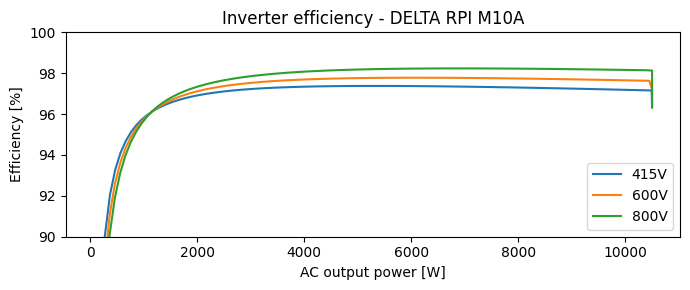

In [33]:
# Plot inverter efficiency

# DC voltage (V)
dc_voltage = np.array([415,600,800])
# DC power (W)
dc_power = np.arange(100,11000,100)

plt.figure(figsize=(7,3))
for i in range(len(dc_voltage)):
    # Estimate AC output with the Sandia model
    ac_power = pvlib.inverter.sandia(dc_voltage[i], dc_power, inverter_10kVA)
    efficieny = ac_power/dc_power*100
    # Plot results
    plt.plot(ac_power, efficieny, label = str(dc_voltage[i]) + 'V')
    
# Add the title, axis labels and legend: 
plt.title('Inverter efficiency - DELTA RPI M10A')
plt.xlabel('AC output power [W]')
plt.ylabel('Efficiency [%]')
plt.ylim([90,100])
plt.legend()
plt.tight_layout()

<h3>DELTA Electronics RPI M15A</h3>

<p  style='text-align: center'><img width="300" src = 'https://github.com/Laboratoire-Piment/TwInSolar_PV_system_modelling/blob/main/images/Inverter_DELTA_RPI_M15A.jpg?raw=true'></p>

| AC output |       |  | DC input |       |
|-----------|-------|--|----------|-------|
| Rated AC power | 15kW |  | Max DC power | 19kW |
| Max AC power | 16.5kW |  | Nominal DC voltage | 600V |
| AC voltage | 3 phase 230/400V |  | MPP tracker | 2 |
| Maximum efficiency | 98.4% |  | MMPT voltage range | 380V - 900V |

<p style='text-align: center'>Table: Inverter DELTA RPI M15A Technical data (<a href='https://solarsolutions.delta-emea.com/en/RPI-M15A-276.htm'>complete datasheet here</a>)</p>

In the <a href='https://cdn.delta-emea.com/cs/download/file/4239147_1_RPI_M15A_M20A_RPI153FA0E0000_RPI203FA0E0000_Manual_EU_EN.pdf'>user manual</a> of the inverter, one can find the efficiency curve of the inverter, which gives the efficiency for the minimum, nominal and maximum voltages of the MPP tracker inputs. The image below shows the efficiency curves of the inverter DELTA RPI M15A. From the plots, we estimated the AC and DC power for the 3 voltages and fractions of maximum AC power ranging from 5% to 100% (11 points per curve). The estimates have been stored in a csv file (DELTA_RPI_M15A.csv) that we used to compute the inverter parameters required by the Sandia model.

<p style='text-align: center'><img width='500' src='https://github.com/Laboratoire-Piment/TwInSolar_PV_system_modelling/blob/main/images/Inverter_DELTA_RPI_M15A_efficiency_curves.png?raw=true'></p>
<p style='text-align: center'>Figure: Inverter DELTA RPI M15A efficiency curves</p>

In [36]:
# Inverter parameters from datasheet

Paco = 16500 # Maximum AC power
pnt = 2 # Night power

# Import inverter efficiency curves from a text file
EC_DELTA_RPI_M15A = pd.read_csv('DELTA_RPI_M15A.csv', skiprows = 9)

# Compute inverter parameters requiured by the Sandia model
inverter_15kVA = pvlib.inverter.fit_sandia(ac_power = EC_DELTA_RPI_M15A['ac_power'],
                                           dc_power = EC_DELTA_RPI_M15A['dc_power'],
                                           dc_voltage = EC_DELTA_RPI_M15A['dc_voltage'],
                                           dc_voltage_level = EC_DELTA_RPI_M15A['dc_voltage_level'],
                                           p_ac_0 = Paco,
                                           p_nt = pnt)

print('Inverter parameters:', inverter_15kVA)

Inverter parameters: {'Paco': 16500, 'Pdco': 16929.11329913389, 'Vdco': 600.0, 'Pso': 81.85080927217211, 'C0': -7.617347303918877e-07, 'C1': -7.341256364612787e-06, 'C2': 0.0013436694399144068, 'C3': -0.0024318138244819004, 'Pnt': 2}


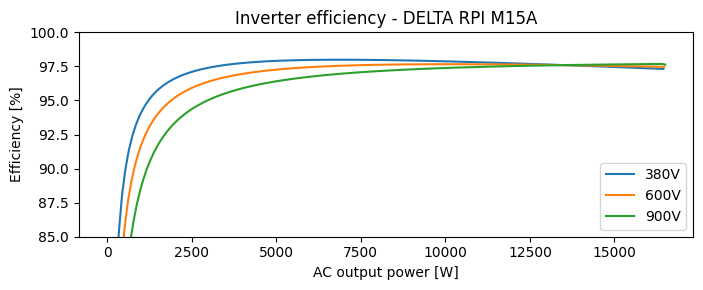

In [39]:
# Plot inverter efficiency

# DC voltage (V)
dc_voltage = np.array([380,600,900])
# DC power (W)
dc_power = np.arange(100,17000,100)

plt.figure(figsize=(7,3))
for i in range(len(dc_voltage)):
    # Estimate AC output with the Sandia model
    ac_power = pvlib.inverter.sandia(dc_voltage[i], dc_power, inverter_15kVA)
    efficieny = ac_power/dc_power*100
    # Plot results
    plt.plot(ac_power, efficieny, label = str(dc_voltage[i]) + 'V')
    
# Add the title, axis labels and legend: 
plt.title('Inverter efficiency - DELTA RPI M15A')
plt.xlabel('AC output power [W]')
plt.ylabel('Efficiency [%]')
plt.ylim([85,100])
plt.legend()
plt.tight_layout()